STEP #0: PROBLEM STATEMENT
- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


STEP #1: IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle #to train, validate and test the data

In [2]:
with open("./traffic-signs-data/train.p", mode = 'rb') as training_data:    # training network
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode = 'rb') as validation_data:    #validates network (ensures that the model is actually learning)
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode = 'rb') as testing_data:    #testing network (test data is never seen by the network during training)
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

STEP #2: IMAGE EXPLORATION

1

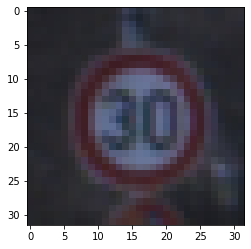

In [10]:
i = 4000
plt.imshow(X_train[i]) #Shows the images are not shuffled
y_train[i]

7

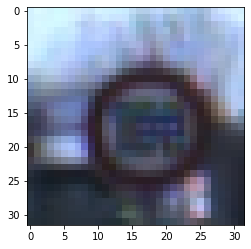

In [11]:
i = 3000
plt.imshow(X_validation[i])
y_validation[i]

35

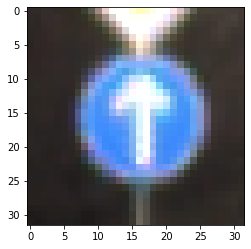

In [12]:
i = 1100
plt.imshow(X_test[i])
y_test[i]

STEP #3: DATA PREPARATION

In [13]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)    # shuffling dataset

In [14]:
#greyscaling
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [15]:
X_train_gray.shape

(34799, 32, 32, 1)

In [16]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [17]:
X_test_gray.shape

(12630, 32, 32, 1)

In [18]:
# normalising image (Converting image pixel range from -1 to 1)
X_train_gray_norm = (X_train_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [19]:
X_train_gray_norm

array([[[[-0.3828125 ],
         [-0.375     ],
         [-0.29947917],
         ...,
         [-0.38802083],
         [-0.34114583],
         [-0.3515625 ]],

        [[-0.38541667],
         [-0.359375  ],
         [-0.30729167],
         ...,
         [-0.38541667],
         [-0.4453125 ],
         [-0.51041667]],

        [[-0.46614583],
         [-0.40625   ],
         [-0.34114583],
         ...,
         [-0.47395833],
         [-0.54427083],
         [-0.56770833]],

        ...,

        [[-0.3828125 ],
         [-0.375     ],
         [-0.3125    ],
         ...,
         [-0.58333333],
         [-0.59895833],
         [-0.58333333]],

        [[-0.36458333],
         [-0.33072917],
         [-0.27864583],
         ...,
         [-0.62239583],
         [-0.6171875 ],
         [-0.609375  ]],

        [[-0.36979167],
         [-0.34635417],
         [-0.3125    ],
         ...,
         [-0.63020833],
         [-0.62760417],
         [-0.61979167]]],


       [[[-0.74739583],


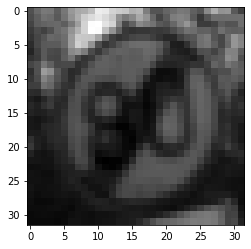

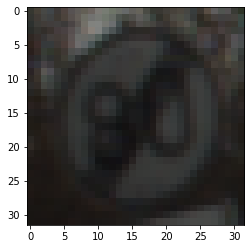

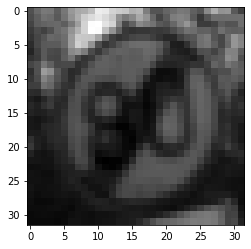

In [20]:
# confirming image quality after greyscaling and normalisation
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

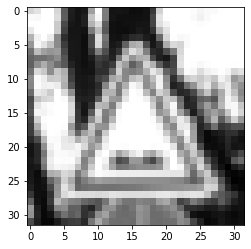

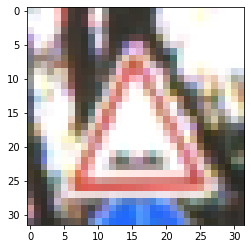

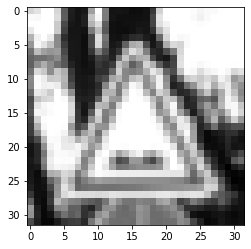

In [21]:
#rough
# confirming image quality after greyscaling and normalisation
i = 610
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

STEP#4: MODEL TRAINING

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [23]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size = (5,5), activation = 'relu', input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))

cnn_model.add(Dense(units = 84, activation = 'relu'))

cnn_model.add(Dense(units = 43, activation = 'softmax'))    # softmax is used so that output should be in no.s eg. 0-43

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [25]:
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size = 500,
             nb_epoch = 50,
             verbose = 1,
             validation_data = (X_validation_gray_norm, y_validation))

c:\users\ritik\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 18s 508us/step - loss: 3.2491 - accuracy: 0.1418 - val_loss: 2.9168 - val_accuracy: 0.2492
Epoch 2/50
34799/34799 [==============================] - 17s 489us/step - loss: 1.9172 - accuracy: 0.4733 - val_loss: 1.7297 - val_accuracy: 0.4948
Epoch 3/50
34799/34799 [==============================] - 16s 465us/step - loss: 1.1461 - accuracy: 0.6706 - val_loss: 1.2241 - val_accuracy: 0.6524
Epoch 4/50
34799/34799 [==============================] - 16s 456us/step - loss: 0.8356 - accuracy: 0.7572 - val_loss: 1.0735 - val_accuracy: 0.6735
Epoch 5/50
34799/34799 [==============================] - 16s 461us/step - loss: 0.6673 - accuracy: 0.8090 - val_loss: 0.9038 - val_accuracy: 0.7358
Epoch 6/50
34799/34799 [==============================] - 16s 469us/step - loss: 0.5489 - accuracy: 0.8454 - val_loss: 0.8112 - val_accuracy: 0.7669
Epoch 7/50
34799/34799 [==============================] -

STEP#5: MODEL EVALUATION

In [26]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 4s 332us/step
Test Accuracy: 0.8302454352378845


In [27]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [30]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

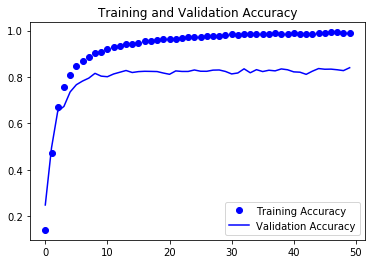

In [31]:
epochs = range(len(accuracy))   #number of epochs

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

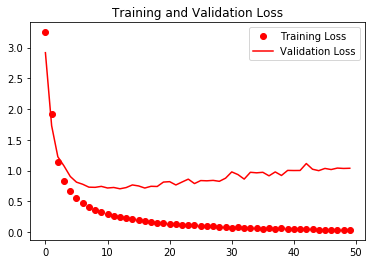

In [32]:
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [33]:
#getting predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#getting indices to be plot
y_true = y_test

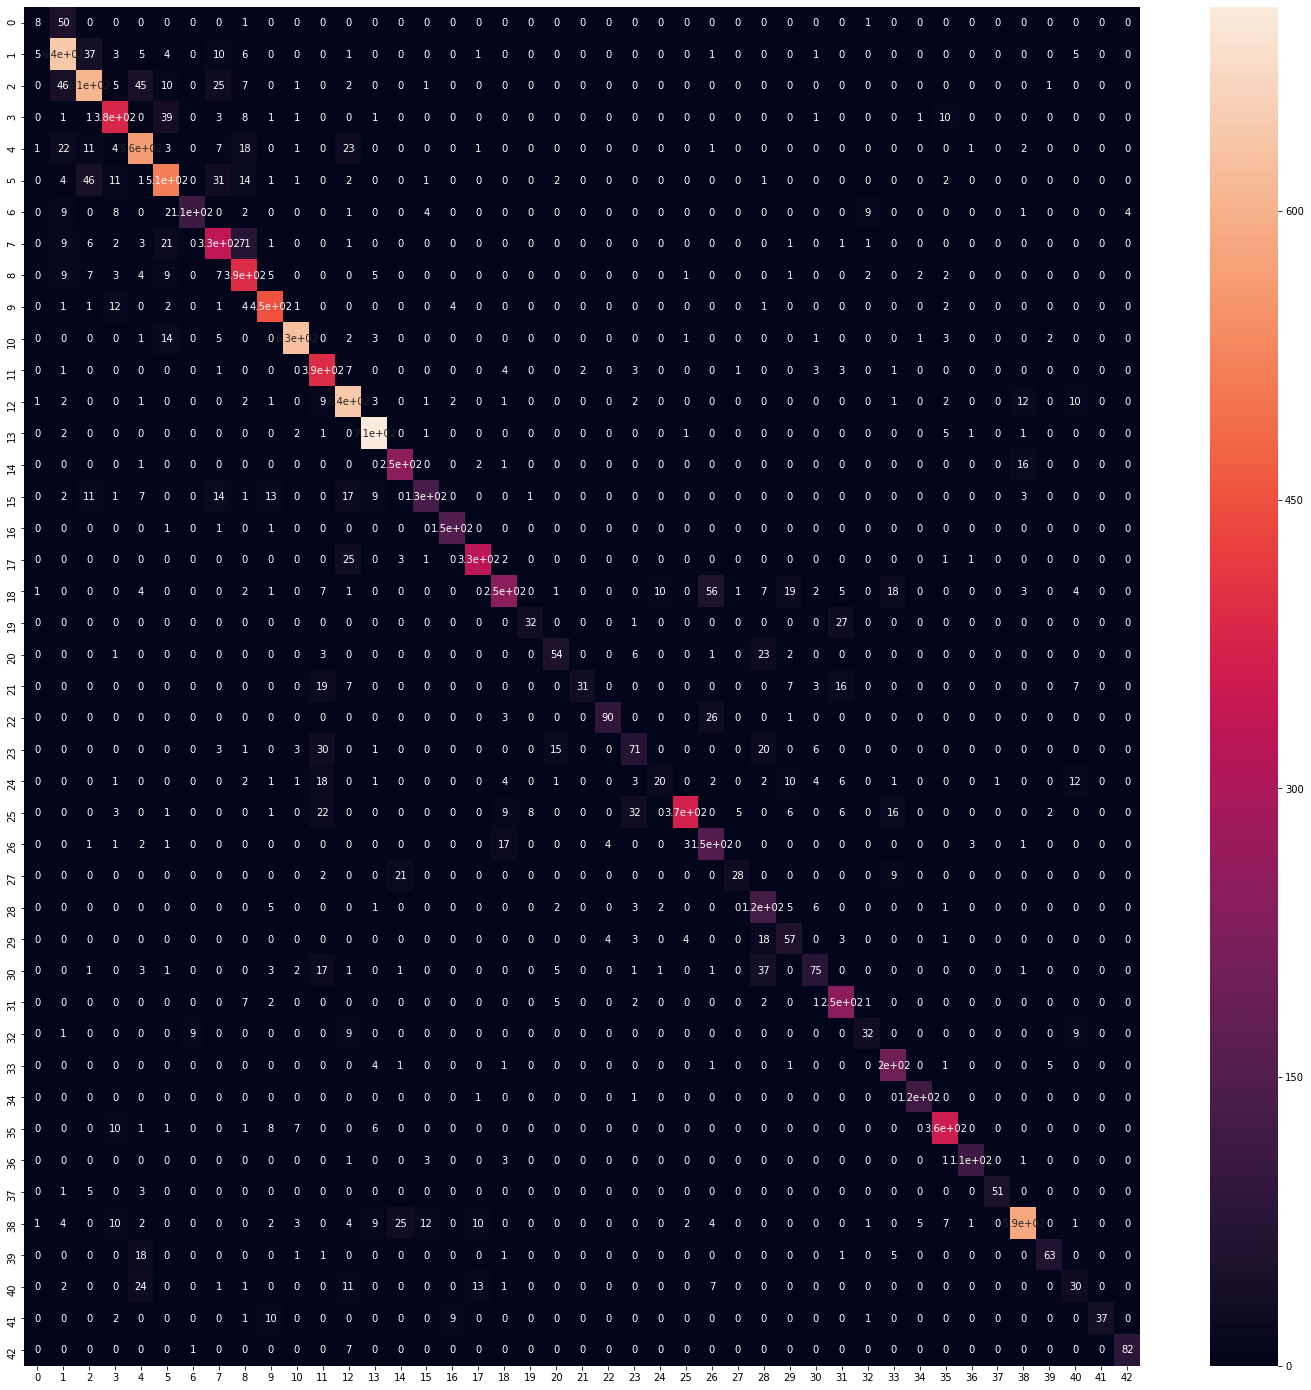

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

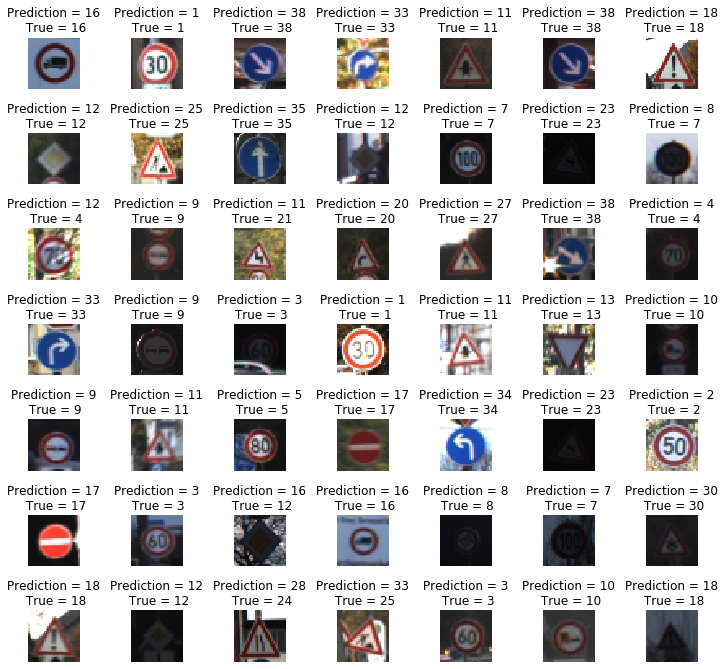

In [35]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction = {}\n True = {}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)